# Examples Sheet 2 - PDS

## Pre-Amble

In [48]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as integ
import matplotlib.gridspec as gs

plt.style.use("/home/jhughes2712/projects/coursework/mphildis-coursework/mphil.mplstyle")

## Question 1.

In [2]:
def MVN(x, m, v):
    x = x.reshape((-1,1))
    return (((2 * np.pi)**(x.shape[0]) * np.linalg.det(v))**(-0.5)) * np.exp(- 0.5 * (x - m).T @ np.linalg.inv(v) @ (x - m))[0]

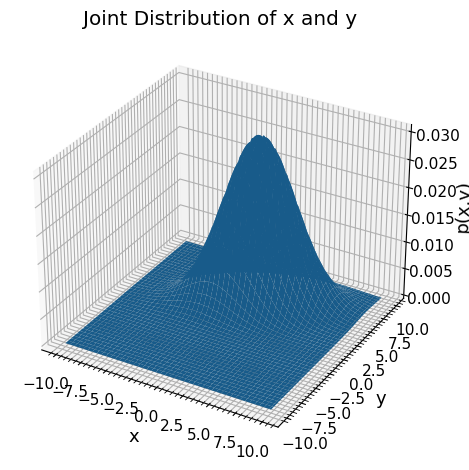

In [4]:
ax = plt.figure().add_subplot(projection='3d')

Mu = np.array([[1], [4]])
V = np.array([[9, 3], [3, 4]])
MVN_xy = lambda x: MVN(x, m=Mu, v=V)

X = np.linspace(-10, 10, 401)
Y = np.linspace(-10, 10, 401)
X, Y = np.meshgrid(X, Y)

W = np.vstack([X.flatten(), Y.flatten()])
Z = np.apply_along_axis(MVN_xy, arr=W, axis=0).reshape(X.shape)

surf = ax.plot_surface(X, Y, Z)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("p(x,y)")
ax.set_title("Joint Distribution of x and y")

plt.show()

In [18]:
lambda y: integ.quad(lambda x: MVN_xy(np.array([[x], [y]])), -np.inf, np.inf)[0]

<function __main__.<lambda>(y)>

In [22]:
MVN_Y(5)

0.1760326633821499

In [29]:
MVN_Y = np.vectorize(lambda y: integ.quad(lambda x: MVN_xy(np.array([[x], [y]])), -np.inf, np.inf)[0])
MVN_X = np.vectorize(lambda x: integ.quad(lambda y: MVN_xy(np.array([[x], [y]])), -np.inf, np.inf)[0])

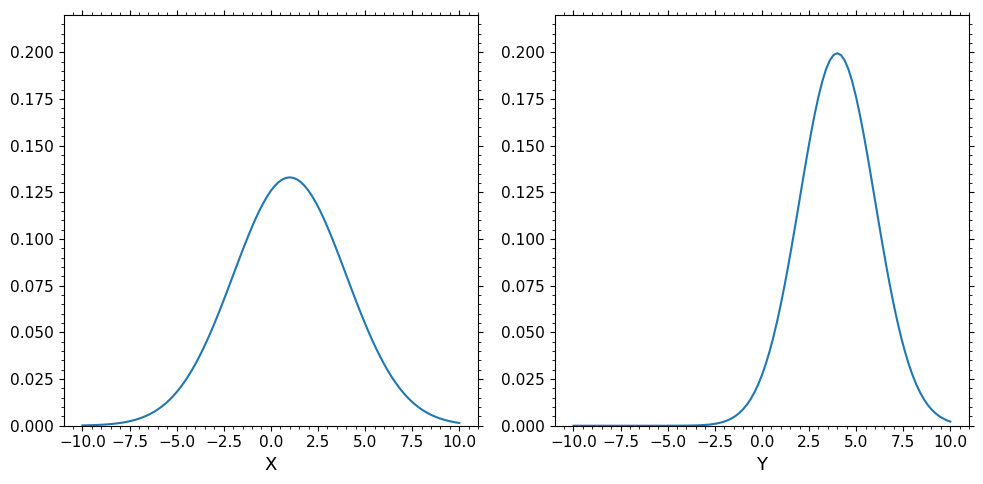

In [65]:
fig = plt.figure(figsize=(10,5))
grid = gs.GridSpec(1, 2)

ax1 = plt.subplot(grid[0,0])
ax1.plot(np.linspace(-10,10,101), MVN_X(np.linspace(-10,10,101)))
ax1.set(xlabel="X", ylim=(0,0.22))

ax2 = plt.subplot(grid[0,1])
ax2.plot(np.linspace(-10,10,101), MVN_Y(np.linspace(-10,10,101)))
ax2.set(xlabel="Y", ylim=(0,0.22))

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,5))
grid = gs.GridSpec(1, 2)

ax1 = plt.subplot(grid[0,0])
ax1.plot(np.linspace(-10,10,101), MVN_X(np.linspace(-10,10,101)))
ax1.set(xlabel="X", ylim=(0,0.22))

ax2 = plt.subplot(grid[0,1])
ax2.plot(np.linspace(-10,10,101), MVN_Y(np.linspace(-10,10,101)))
ax2.set(xlabel="Y", ylim=(0,0.22))

plt.show()

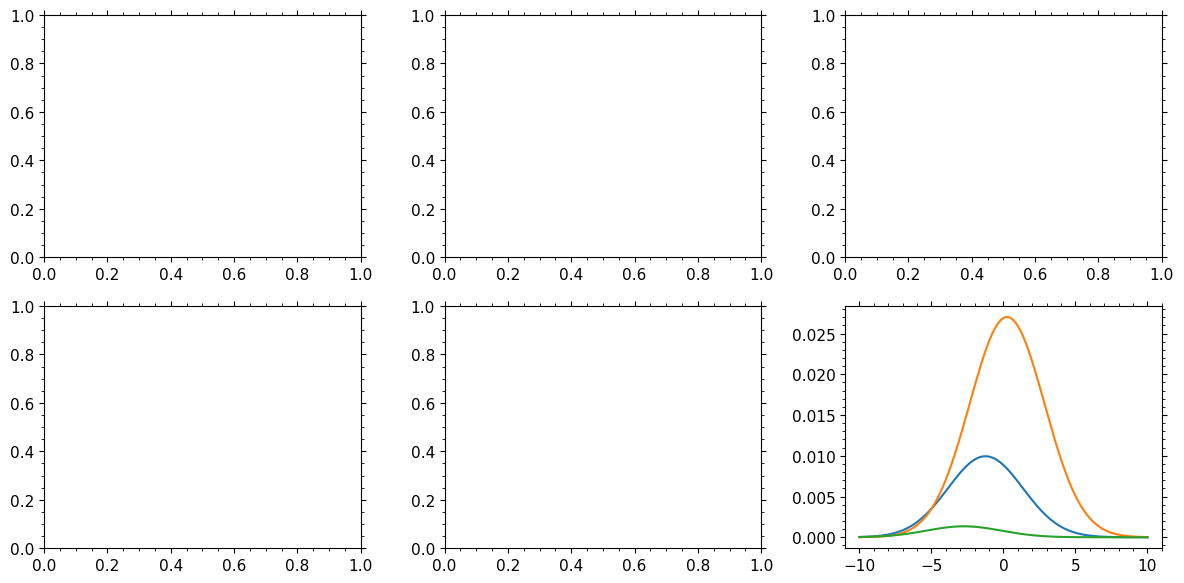

In [16]:
fig, ax = plt.subplots(2,3,figsize=(12,6))

X1 = np.linspace(-10, 10, 401)

W1 = np.vstack([X1, 1*np.ones(401)])
W2 = np.vstack([X1, 3*np.ones(401)])
W3 = np.vstack([X1, -1*np.ones(401)])

Z1 = np.apply_along_axis(lambda x: MVN(x, m=Mu, v=V), arr=W1, axis=0).reshape(X1.shape) / 
Z2 = np.apply_along_axis(lambda x: MVN(x, m=Mu, v=V), arr=W2, axis=0).reshape(X1.shape)
Z3 = np.apply_along_axis(lambda x: MVN(x, m=Mu, v=V), arr=W3, axis=0).reshape(X1.shape)

ax[0,0] = plt.plot(X1, Z1)
ax[0,1] = plt.plot(X1, Z2)
ax[1,2] = plt.plot(X1, Z3)